## Association Rules

## Que: Prepare Association rules for data set

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

## Importing the Data

In [ ]:
book_data = pd.read_csv('/content/book.csv')
book_data.head(6)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1


## Data Understanding

In [ ]:
book_data.shape

(2000, 11)

In [ ]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

## Data Preparation

In [ ]:
# Data preprocessing not required as it is already in transaction format that means dummy variables are already created.

## Model Building

## Association rules with 10% Support and 70% confidence

In [ ]:
books_set = apriori(book_data,min_support=0.1,use_colnames=True)
books_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [ ]:
associat_data = association_rules(books_set,metric='confidence',min_threshold=0.7)
associat_data


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
5,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


In [ ]:
associat_data[(associat_data['confidence']>0.7) & (associat_data['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7ce805790>,
      dtype=object)

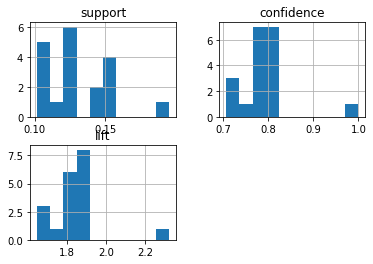

In [ ]:
associat_data[['support','confidence','lift']].hist()

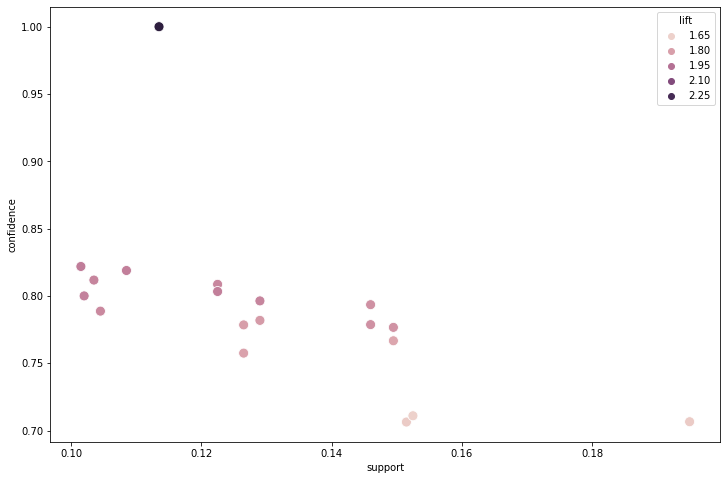

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=associat_data,x='support',y='confidence',hue='lift', s= 100)
plt.show()

## Association rules with 20% Support and 90% confidence

In [ ]:
books_set = apriori(book_data,min_support=0.2,use_colnames=True)
books_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [ ]:
associat_data = association_rules(books_set,metric='confidence',min_threshold=0.2)
associat_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [ ]:
associat_data[(associat_data['confidence']>0.9) & (associat_data['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c8ced9d0>,
      dtype=object)

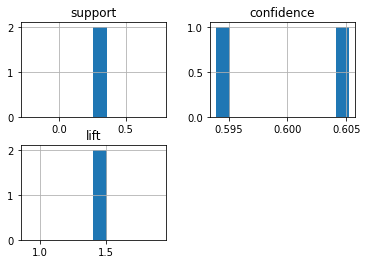

In [ ]:
associat_data[['support','confidence','lift']].hist()

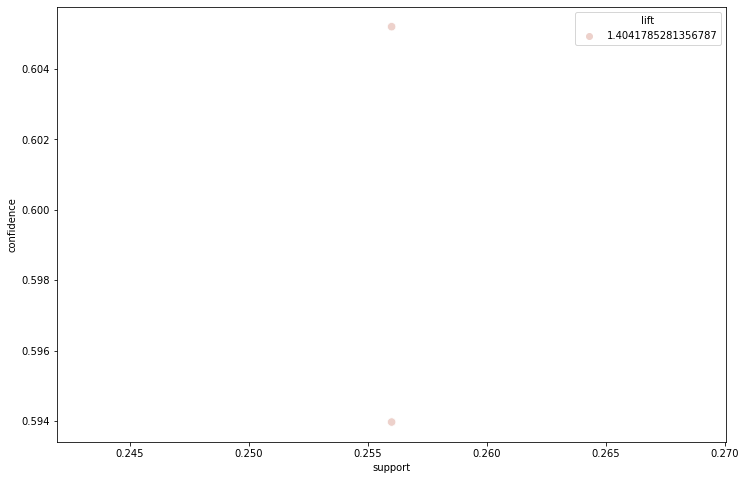

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=associat_data,x='support',y='confidence',hue='lift', s= 70)
plt.show()

## Association rules with 5% Support and 60% confidence



In [ ]:
books_set = apriori(book_data,min_support=0.05,use_colnames=True)
books_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, GeogBks, YouthBks)"
96,0.0560,"(CookBks, ArtBks, GeogBks, YouthBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(CookBks, GeogBks, ChildBks, YouthBks, DoItYBks)"


In [ ]:
associat_data = association_rules(books_set,metric='confidence',min_threshold=0.6)
associat_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(ArtBks, DoItYBks, GeogBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
131,"(ChildBks, ArtBks, DoItYBks, CookBks)",(GeogBks),0.0820,0.276,0.0535,0.652439,2.363910,0.030868,2.083088
132,"(ChildBks, ArtBks, DoItYBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
133,"(ChildBks, DoItYBks, GeogBks, CookBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845


In [ ]:
associat_data[(associat_data['confidence']>0.7) & (associat_data['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
16,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
28,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
30,(ItalCook),"(ChildBks, CookBks)",0.1135,0.256,0.0850,0.748899,2.925385,0.055944,2.962947
31,"(RefBks, DoItYBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
34,"(RefBks, ArtBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
36,"(RefBks, GeogBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152
45,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
52,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
57,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c8ad2650>,
      dtype=object)

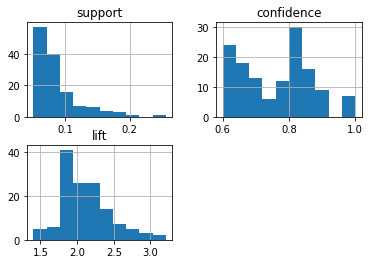

In [ ]:
associat_data[['support','confidence','lift']].hist()

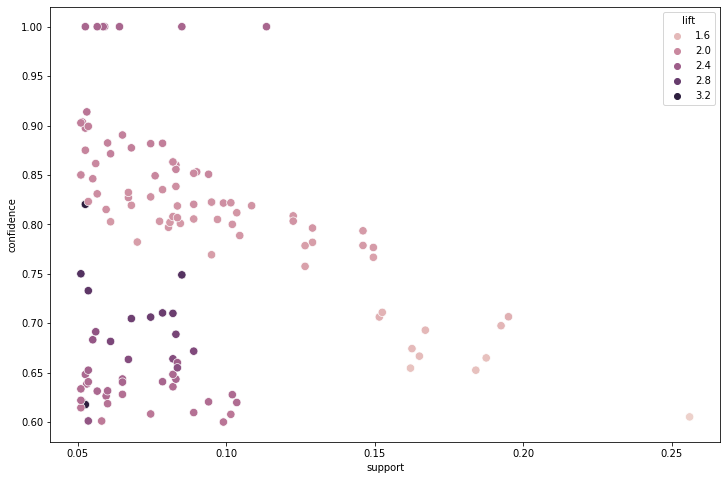

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=associat_data,x='support',y='confidence',hue='lift', s= 70)
plt.show()

In [ ]:
def to_list(i):
    return (sorted(list(i)))


ma_X = associat_data.antecedents.apply(to_list)+associat_data.consequents.apply(to_list)

In [ ]:

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [ ]:
# getting rules without any redudancy 
rules_no_redudancy  = associat_data.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
119,"(ArtBks, YouthBks, CookBks)",(GeogBks),0.0810,0.276,0.0560,0.691358,2.504920,0.033644,2.345760
47,"(ArtBks, YouthBks)",(GeogBks),0.1010,0.276,0.0650,0.643564,2.331755,0.037124,2.031222
70,"(ChildBks, YouthBks, CookBks)",(GeogBks),0.1290,0.276,0.0830,0.643411,2.331199,0.047396,2.030348
45,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
57,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
58,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
52,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
106,"(ChildBks, GeogBks, ItalCook)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf
12,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
28,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
